# Hồi quy Đa thức (Polynomial Regression)

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab, này bạn sẽ có thể:

-   Sử dụng scikit-learn để triển khai Hồi quy đa thức
-   Tạo một mô hình, huấn luyện, kiểm tra và sử dụng mô hình


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#polynomial_regression">Hồi quy đa thức</a></li>
        <li><a href="#Đánh giá">Đánh giá</a></li>
        <li><a href="#practice">Thực hành</a></li>
    </ol>
</div>
<br>
<hr>


### Nhập các gói cần thiết


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Hiểu biết Dữ liệu

### `FuelConsumption.csv`:

Chúng tôi đã download tập dữ liệu tiêu thụ nhiên liệu, **`FuelConsumption.csv`**, chứa xếp hạng mức tiêu thụ nhiên liệu cụ thể cho từng mẫu xe và lượng khí thải CO2 ước tính cho các loại xe hạng nhẹ bán lẻ mới ở Canada. [Nguồn tập dữ liệu](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** ví dụ: 2014
-   **MAKE** ví dụ: Acura
-   **MODEL** ví dụ: ILX
-   **VEHICLE CLASS** ví dụ: SUV
-   **ENGINE SIZE** ví dụ: 4.7
-   **CYLINDERS** ví dụ: 6
-   **TRANSMISSION** ví dụ: A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** ví dụ: 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** ví dụ: 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** ví dụ: 9.2
-   **CO2 EMISSIONS (g/km)** ví dụ: 182   --> low --> 0


## Đọc dữ liệu vào


In [2]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Cho phép chọn một số đặc trưng mà chúng ta muốn sử dụng cho hồi quy.



In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Hãy vẽ biểu đồ giá trị Emission liên quan đến Engine size:


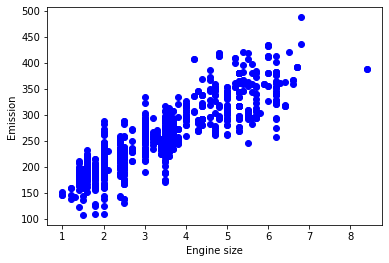

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Tạo tập dữ train và test

Train/Test Split liên quan đến việc chia nhỏ tập dữ liệu thành training set và test set tương ứng loại trừ lẫn nhau. Sau đó, bạn huấn luyện với training set và test set.


In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Hồi quy Đa thức</h2>


Đôi khi, xu hướng của dữ liệu không thực sự tuyến tính và trông có vẻ cong. Trong trường hợp này chúng ta có thể sử dụng phương pháp hồi quy Đa thức. Trên thực tế, tồn tại nhiều phép hồi quy khác có thể được sử dụng để fit với kỳ tập dữ liệu nào, chẳng hạn như bậc hai, bậc ba, ... và có thể tới vô hạn.

Về bản chất, chúng ta có thể gọi tất cả những điều này là hồi quy đa thức, trong đó mối quan hệ giữa biến độc lập x và biến phụ thuộc y được mô hình hóa dưới dạng đa thức bậc n trong x. Giả sử bạn muốn có một hồi quy đa thức (hãy tạo đa thức bậc 2):

$$ y = b + \theta_1 x + \theta_2 x ^ 2 $$

Bây giờ, câu hỏi là: làm thế nào để fit dữ liệu ở phương trình này trong khi chỉ có các giá trị x, chẳng hạn như **Engine Size**?
Chà, chúng ta có thể tạo một vài đặc trưng bổ sung: 1, $x$, and $x^2$.

Hàm **PolynomialFeatures()** trong thư viện Scikit-learning thúc đẩy một tập đặc trưng mới từ tập đặc trưng gốc. Tức là, sẽ tạo ra một ma trận gồm tất cả các tổ hợp đa thức với các dặc trưng có bậc nhỏ hơn hoặc bằng bậc đã chỉ định. Ví dụ: giả sử tập đặc trưng ban đầu chỉ có một đặc trưng là _ENGINESIZE_. Bây giờ, nếu chúng ta chọn bậc của đa thức là 2, thì nó sẽ tạo ra 3 đặc trưng: degree=0, degree=1 và degree=2:


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** nhận các giá trị x và xuất ra một danh sách dữ liệu được nâng từ lũy thừa 0 lên lũy thừa 2 (vì chúng ta đặt bậc của đa thức là 2).

Phương trình và ví dụ mẫu được hiển thị bên dưới.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


Nó trông giống các tập đặc trưng cho phân tích hồi quy tuyến tính đa thức, phải không? Đúng. Thật vậy, hồi quy đa thức là một trường hợp đặc biệt của hồi quy tuyến tính, với ý tưởng chính là cách bạn chọn các đặc trưng. Chỉ cần xem xét thay thế $ x $ bằng $ x_1 $, $ x_1 ^ 2 $ bằng $ x_2 $, ... Sau đó, phương trình bậc 2 sẽ được chuyển thành:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Bây giờ, chúng ta có thể giải quyết nó như với bài toán 'hồi quy tuyến tính'. Do đó, hồi quy đa thức này được coi là một trường hợp đặc biệt của hồi quy tuyến tính đa biến truyền thống. Vì vậy, bạn có thể sử dụng cơ chế tương tự như hồi quy tuyến tính để giải quyết các bài toán như vậy.

Vậy chúng ta có thể sử dụng hàm **LinearRegression()** để giải quyết nó:


In [13]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.04062827 -1.67279855]]
Intercept:  [107.55254377]


Như đã đề cập trước đây, **Hệ số** và **Hệ số chặn** là các tham số của fit curvy line.
Biết rằng đây là một hồi quy tuyến tính đa biến điển hình với 3 tham số và biết rằng các tham số là hệ số chặn và hệ số của siêu phẳng (hyperplane), sklearn đã ước tính chúng từ tập mới của các tập đặc trưng. Hãy vẽ nó:


Text(0, 0.5, 'Emission')

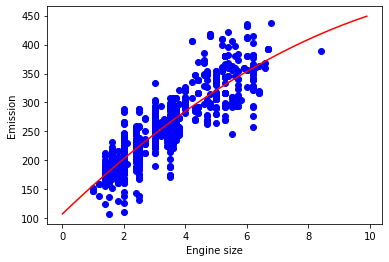

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Đánh giá</h2>


In [14]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 23.18
Residual sum of squares (MSE): 906.64
R2-score: 0.78


<h2 id="practice">Thực hành</h2>
Hãy thử sử dụng hồi quy đa thức với tập dữ liệu nhưng lần này là với bậc ba. Nó có cho ra độ chính xác tốt hơn không?


Mean absolute error: 23.17
Residual sum of squares (MSE): 911.49
R2-score: 0.78


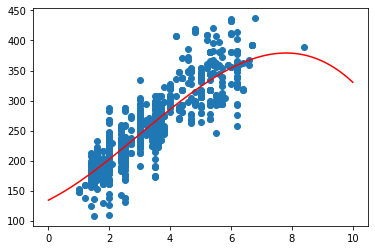

In [29]:
# Nhập code của bạn tại đây
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
lr = linear_model.LinearRegression()
train_y_ = lr.fit(train_x_poly, train_y)

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])
XX = np.linspace(0, 10, 100)
YY = lr.intercept_[0] + lr.coef_[0][1]*XX + lr.coef_[0][2]*(XX**2) + lr.coef_[0][3]*(XX**3) 
plt.plot(XX, YY, color = 'red')

test_x_poly = poly.fit_transform(test_x)
test_y_ = lr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

<details><summary>Click vào đây để xem lời giải</summary>

```python
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

```

</details>


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**